# TASK 2 - PREDICTION USING UNSUPERVISED ML

### AUTHOR - AISHWARYA GYANJYOTI

### OBJECTIVE : Predicting the optimum number of clusters from "IRIS" dataset and representing it visually.

## IMPORTING LIBRARIES

In [1]:
#For getting rid of unnecessary warnings.
import warnings
warnings.simplefilter("ignore")

In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

#For scaling, K-means and silhoutte score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## READING AND UNDERSTANDING THE DATA 

In [3]:
#Loading the "Iris" dataset
data_iris = pd.read_csv("Iris.csv")
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Information of Iris dataset
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Shape of the dataset
data_iris.shape

(150, 6)

In [6]:
#Checking the null values
data_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Numerical description of Iris dataset
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Count of Iris's Species 
data_iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## DATA VISUALIZATION

### UNIVARIATE ANALYSIS

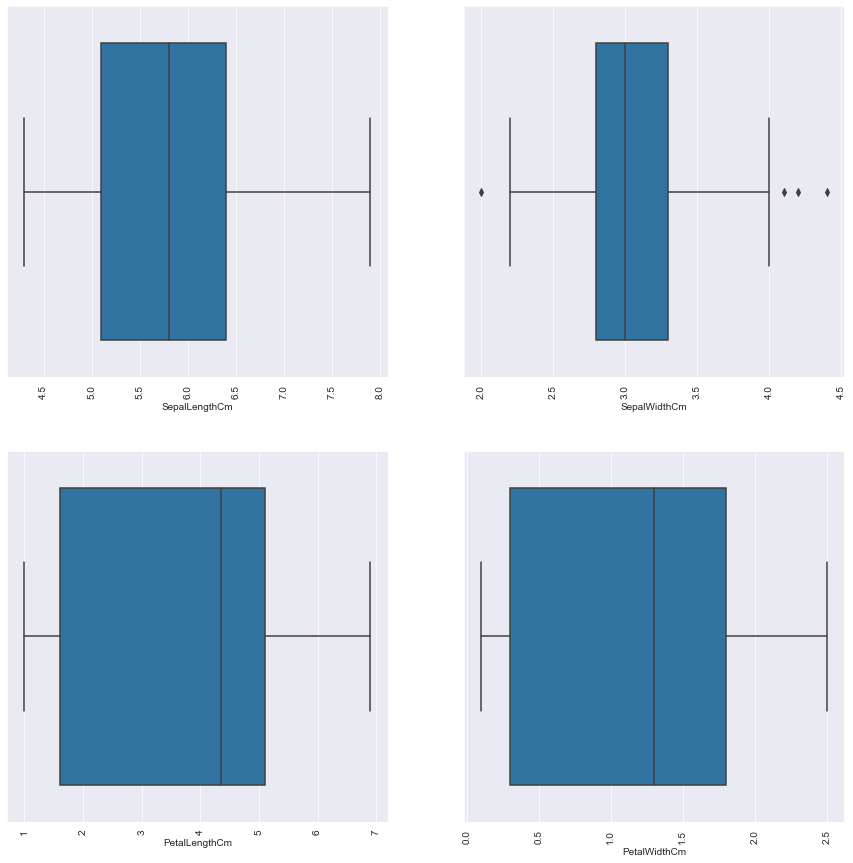

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(x='SepalLengthCm',data=data_iris)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x='SepalWidthCm',data=data_iris)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x='PetalLengthCm',data=data_iris)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x='PetalWidthCm',data=data_iris,)
plt.xticks(rotation=90)

plt.show()

**`INFERENCE:`** In the above boxplot, there's a visibility of outliers in "SepalWidthCm" column.

### BIVARIATE ANALYSIS

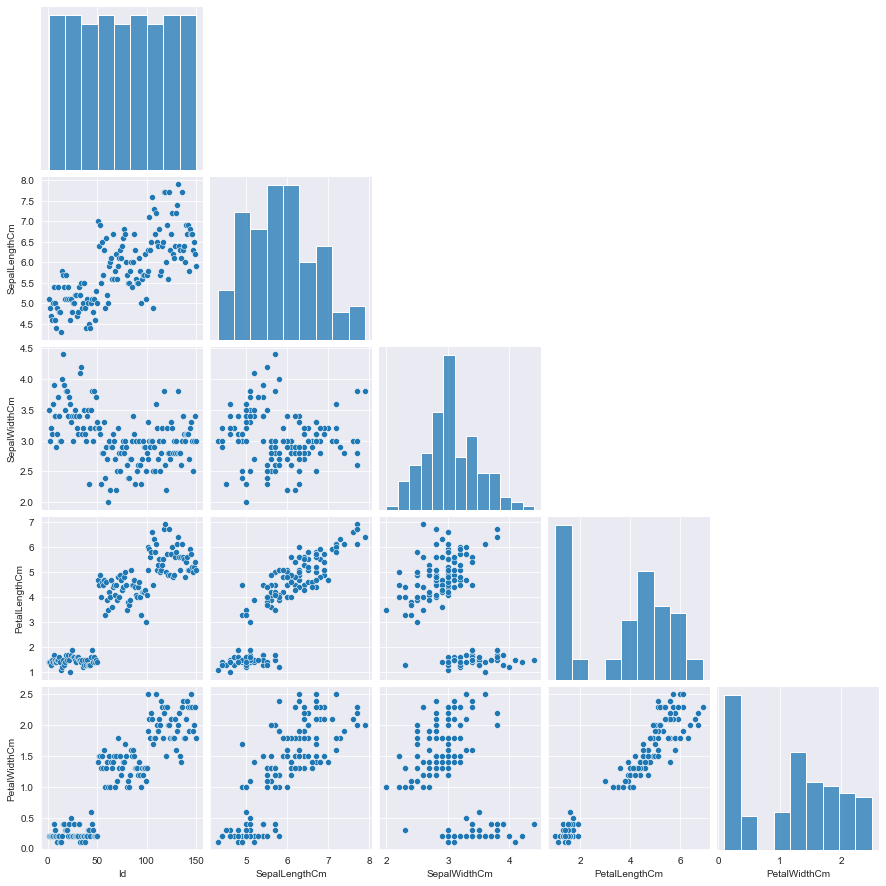

In [10]:
sns.pairplot(data_iris,corner = True)
plt.show()

## DATA PREPARATION AND SCALING

In [11]:
#Creating a new dataframe dropping Id and Species for the next step i.e., Data Scaling
iris_df = data_iris.drop(["Id","Species"],axis = 1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
#Required libraries for Hopkins statistics imported. It's been used for checking the cluster tendency of the dataset.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
#Hopkins measure
hopkins(iris_df)

0.8524033590053671

In [14]:
#Data Scaling
scaler = MinMaxScaler()
iris_scale = scaler.fit_transform(iris_df)
iris_scale.shape

(150, 4)

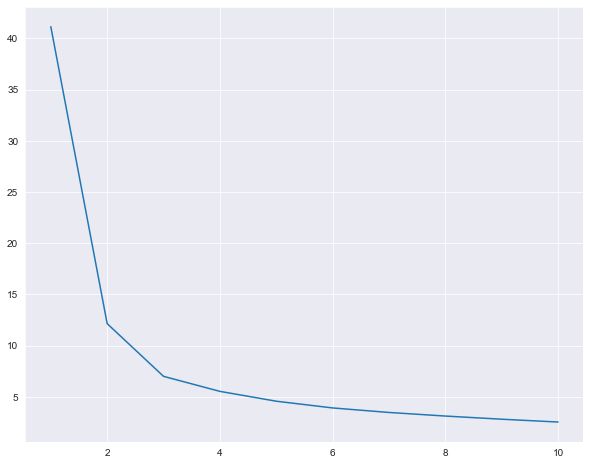

[[1, 41.13817202297779],
 [2, 12.143688281579719],
 [3, 6.9981140048267605],
 [4, 5.5328310030819],
 [5, 4.571211374951954],
 [6, 3.91395287288372],
 [7, 3.4723522656964123],
 [8, 3.1218775720692373],
 [9, 2.813784212423721],
 [10, 2.538160449355856]]

In [15]:
#Elbow Curve Method for determining the number of clusters in a data set.
ssd = []
for k in range(1,11):
    model = KMeans(n_clusters = k, max_iter = 50).fit(iris_scale)
    ssd.append([k, model.inertia_])
plt.figure(figsize=(10,8))
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.show()
ssd

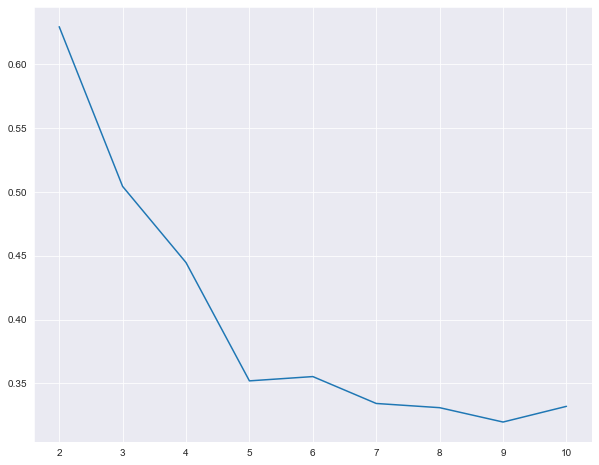

[[2, 0.6294675561906644],
 [3, 0.5043188549150884],
 [4, 0.4446273300650682],
 [5, 0.351912893247111],
 [6, 0.35527143123692945],
 [7, 0.33420094667605527],
 [8, 0.33090191227163235],
 [9, 0.3196527890464023],
 [10, 0.3319494878329813]]

In [16]:
# Silhoutte Score analysis used to know the separation distance between the resulting clusters.
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(iris_scale)
    ss.append([k, silhouette_score(iris_scale, kmeans.labels_)])
    
plt.figure(figsize=(10,8))    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.show()
ss

### With the help of Elbow-curve method, the optimum number of clusters or K values can be found. And for the iris dataset, K seems to be 2 and 3. 

## K=2

In [17]:
# K means clustering using K=2
kmeans = KMeans(n_clusters = 2, max_iter = 50,random_state=50)
kmeans.fit(iris_scale)

KMeans(max_iter=50, n_clusters=2, random_state=50)

In [18]:
kmeans.cluster_centers_

array([[0.545     , 0.36333333, 0.6620339 , 0.65666667],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ]])

In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
iris_1 = pd.DataFrame(iris_scale,columns=iris_df.columns)
iris_1["cluster_id"] = kmeans.labels_
iris_1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_id
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


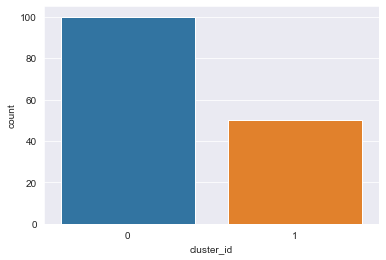

In [21]:
#Plotting Species Column on the basis of cluster_id
sns.countplot(iris_1.cluster_id)
plt.show()

In [22]:
iris_1.cluster_id.value_counts()

0    100
1     50
Name: cluster_id, dtype: int64

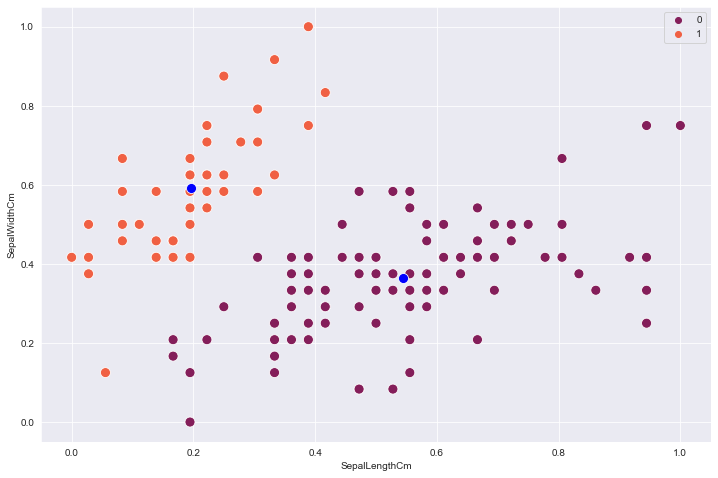

In [23]:
#K-means clustering plot depicting the position of k-means cluster labels on the basis of species and centroid of it.
plt.figure(figsize=(12,8))  
sns.scatterplot(data=iris_1, x="SepalLengthCm", y="SepalWidthCm",hue="cluster_id",s=100,palette="rocket", legend="full")
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], legend="full",s=100,color="blue")
plt.show()

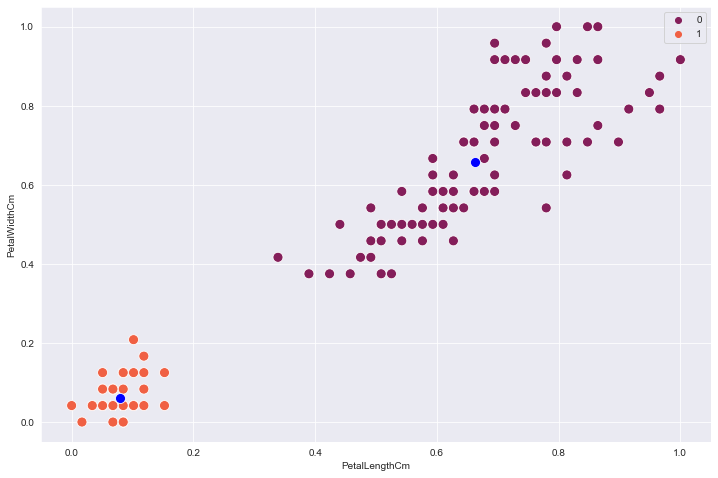

In [24]:
plt.figure(figsize=(12,8))  
sns.scatterplot(data=iris_1, x="PetalLengthCm", y="PetalWidthCm",hue="cluster_id",s=100,palette="rocket", legend="full")
sns.scatterplot(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], legend="full",s=100,color="blue")
plt.show()

**`INFERENCE:`** : As per the above plots, 
- Both the clusters aren't overlapping,but it's cluster label points are scattered despite being closer to centroid. Not Uniformly distributed.
- Cluster_Id 0 and 1 are distant from each other in second plot.

## K=3

In [25]:
# K means clustering using K=3
kmeans = KMeans(n_clusters = 3, max_iter = 50,random_state=50)
kmeans.fit(iris_scale)
y_kmeans = kmeans.fit_predict(iris_scale)

In [26]:
#Centroids of clusters
kmeans.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [27]:
#Cluster labels array
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [28]:
#Creating another dataset taking cluster_id as species
iris_0 = pd.DataFrame(iris_scale,columns=iris_df.columns)
iris_0["cluster_id"] = kmeans.labels_
iris_0["Species"] = iris_0["cluster_id"].replace({0:"Virginica",1:"Versicolor",2:"Setosa"}) 
iris_0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_id,Species
0,0.222222,0.625000,0.067797,0.041667,1,Versicolor
1,0.166667,0.416667,0.067797,0.041667,1,Versicolor
2,0.111111,0.500000,0.050847,0.041667,1,Versicolor
3,0.083333,0.458333,0.084746,0.041667,1,Versicolor
4,0.194444,0.666667,0.067797,0.041667,1,Versicolor


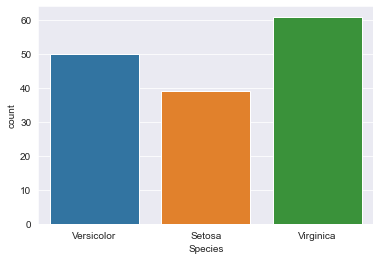

In [29]:
#Plotting Species Column on the basis of cluster_id
sns.countplot(iris_0.Species)
plt.show()

In [30]:
#Count of different species of Iris
iris_0.Species.value_counts()

Virginica     61
Versicolor    50
Setosa        39
Name: Species, dtype: int64

## K-MEANS CLUSTER VISUALIZATION

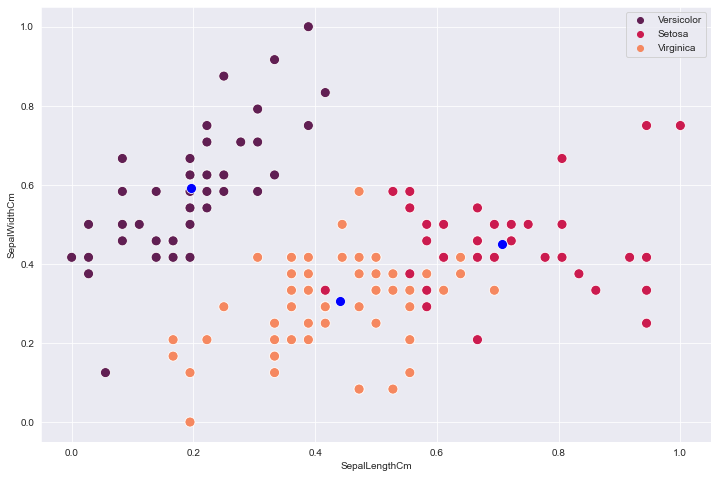

In [31]:
#K-means clustering plot depicting the position of k-means cluster labels on the basis of species and centroid of it.
plt.figure(figsize=(12,8))  
sns.scatterplot(data=iris_0, x="SepalLengthCm", y="SepalWidthCm",hue="Species",s=100,palette="rocket", legend="full")
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], legend="full",s=100,color="blue")
plt.show()

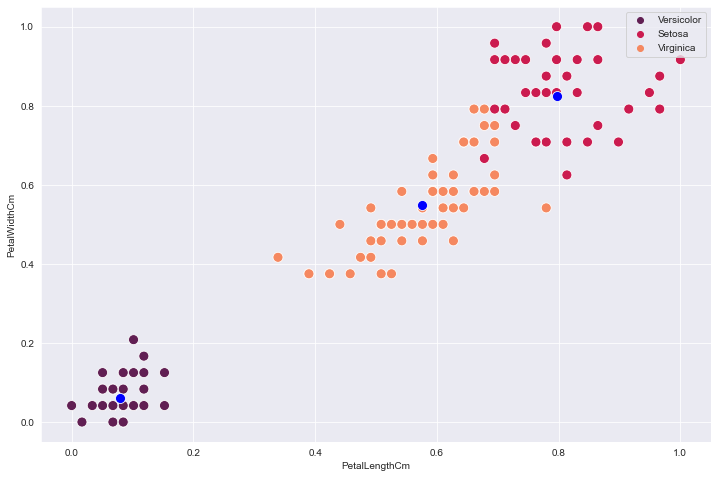

In [32]:
plt.figure(figsize=(12,8))  
sns.scatterplot(data=iris_0, x="PetalLengthCm", y="PetalWidthCm",hue="Species",s=100,palette="rocket", legend="full")
sns.scatterplot(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], legend="full",s=100,color="blue")
plt.show()

**`INFERENCE:`** : 
- There seems to have same data points distribution in comparison to previous plots. K- values varied.
- Species Virginica and Setosa overlaps for Sepal Length Vs Sepal Width and same with PetalLength Vs PetalWidth.
- Moreover, one of the Setosa's cluster label is nearer to the centroid of Species Virginica. 
- Versicolor and Virginica are distant from each other.

### Therefore,the optimum number of clusters for iris is 3.